In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [4]:
#dropping the unnecessary columns

dropping_columns = ["Name","Parch","Ticket","Fare","Embarked","WikiId","Age_wiki","Cabin","Name_wiki","Hometown","Destination","Lifeboat","Body","Class"]
df.drop(dropping_columns,inplace=True, axis=1)

In [5]:
df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Boarded
0,1,0.0,3,male,22.0,1,Southampton
1,2,1.0,1,female,38.0,1,Cherbourg
2,3,1.0,3,female,26.0,0,Southampton
3,4,1.0,1,female,35.0,1,Southampton
4,5,0.0,3,male,35.0,0,Southampton
5,6,0.0,3,male,NaN,0,Queenstown
6,7,0.0,1,male,54.0,0,Southampton
7,8,0.0,3,male,2.0,3,Southampton
8,9,1.0,3,female,27.0,0,Southampton
9,10,1.0,2,female,14.0,1,Cherbourg


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Boarded      1304 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 61.4+ KB


In [7]:
#I want to change the datatypes of columns being in type of float into int64

df = df.dropna() #dropping all NaN values

df['Survived'] = df['Survived'].apply(np.int64) 
df['Age'] = df['Age'].apply(np.int64) 
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  714 non-null    int64 
 1   Survived     714 non-null    int64 
 2   Pclass       714 non-null    int64 
 3   Sex          714 non-null    object
 4   Age          714 non-null    int64 
 5   SibSp        714 non-null    int64 
 6   Boarded      714 non-null    object
dtypes: int64(5), object(2)
memory usage: 39.0+ KB


In [8]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Boarded
0,1,0,3,male,22,1,Southampton
1,2,1,1,female,38,1,Cherbourg
2,3,1,3,female,26,0,Southampton
3,4,1,1,female,35,1,Southampton
4,5,0,3,male,35,0,Southampton
6,7,0,1,male,54,0,Southampton
7,8,0,3,male,2,3,Southampton
8,9,1,3,female,27,0,Southampton
9,10,1,2,female,14,1,Cherbourg
10,11,1,3,female,4,1,Southampton


In [26]:
#counting the number of each class types  
df["Pclass"].value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

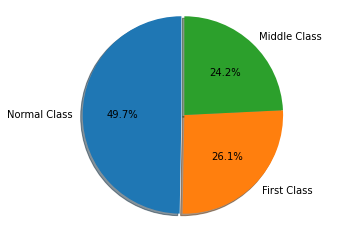

In [13]:
#trying to plot it by using pie chart 

sizes = [i for i in df["Pclass"].value_counts()]
labels = ["Normal Class","First Class","Middle Class"]
colors = ["#F9CDAD", "#FC9D9A", "#83AF9B"]
explode = (0.03,0.0,0.0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show( )

#1 - first class

In [71]:
#trying to find the class impact to the survive posibility

filter1 = (df["Survived"] == 1) & (df["Pclass"] == 3)
df.loc[filter1,["Survived","Pclass"]].shape[0]

print(df.loc[filter1,["Survived","Pclass"]].shape[0],"number of survived people in class 3")

total_surPeople_inClass3 = df.loc[filter1,["Survived","Pclass"]].shape[0]
total_people_inClass3 = df["Pclass"].value_counts().tolist()[0]

print(round((total_SurPeople_inClass3 / total_people_inClass3 * 100),2), "is the percent of survived people in class 3")

85 number of survived people in class 3
23.94 is the percent of survived people in class 3


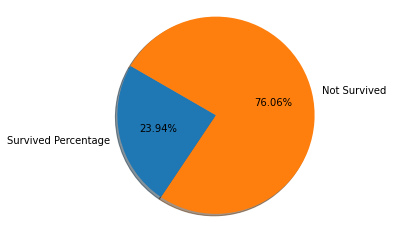

In [72]:
#plotting the survived people percentage for class 3
total_deadPeople_inClass3 = total_people_inClass3 - total_SurPeople_inClass3

sizes = [total_surPeople_inClass3,total_deadPeople_inClass3]
labels = ["Survived Percentage","Not Survived"]
colors = ["#F9CDAD", "#FC9D9A"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show( )

In [80]:
#trying to find the class impact to the survive posibility for first class

filter2 = (df["Survived"] == 0) & (df["Pclass"] == 1)
total_deadPeople_inClass1 = df.loc[filter2,"Survived"].value_counts().tolist()[0]

print(f"{total_deadPeople_inClass1} number of unsurvived people in class 3")

total_people_inClass1 = df.loc[~filter2,"Survived"].value_counts().tolist()[0]
print(f"{total_people_inClass1} number of people in class 3")

total_surPeople_inClass1 = total_people_inClass1 - total_deadPeople_inClass1 
print(f"{total_surPeople_inClass1} number of survived people in class 1")

64 number of unsurvived people in class 3
360 number of people in class 3
296 number of survived people in class 1


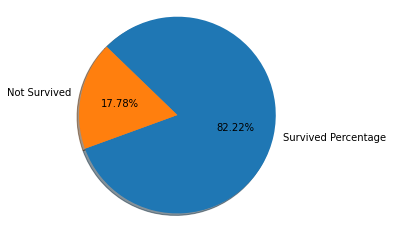

In [79]:
#plotting the survived people percentage for class 1

sizes = [total_surPeople_inClass1,total_deadPeople_inClass1]
labels = ["Survived Percentage","Not Survived"]
colors = ["#F9CDAD", "#FC9D9A"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=200)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show( )

## Here we can see the percentage of survived people in class1(first class) is really high and in class 3(normal class) really low. We easily understand that most people in first class could manage to survive and other most in class 3 could not. 

## It might be just because of the room security or quality. Or only first class rooms might contain a life preserver.

In [94]:
# comparing genders according to unsurvived people

(df["Sex"] == "female").value_counts()

False    453
True     261
Name: Sex, dtype: int64

In [114]:
total_Women = list((df["Sex"] == "female").value_counts())[1]
total_Women

261

In [115]:
total_Men = list((df["Sex"] == "female").value_counts())[0]
total_Men

453

In [119]:
#finding unsurvived number of females

filter3 = (df["Survived"] == 0) & (df["Sex"] == "female")
df.loc[filter3].shape

(64, 7)

In [122]:
total_deadWomen = df.loc[filter3].shape[0]
print(f"total number of unsurvived females are {total_deadWomen}")

filter4 =(df["Survived"] == 0) & (df["Sex"] == "male")
total_deadMen = df.loc[filter4].shape[0]
print(f"total number of unsurvived males are {total_deadMen}")

total number of unsurvived females are 64
total number of unsurvived males are 360


In [123]:
total_surPeople = (total_Women+total_Men) - (total_deadMen+total_deadWomen)

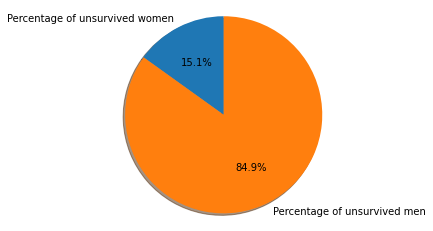

In [143]:
#finding percentage of unsurvived people by grouping by their genders

sizes = [total_deadWomen,total_deadMen]
labels = ["Percentage of unsurvived women","Percentage of unsurvived men"]
colors = ["#F9CDAD", "#FC9D9A"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show( )

## Here we see that most unsurvived people's gender is male. 

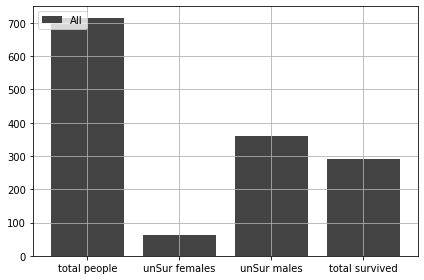

In [130]:
#plotting it by using barplot

total_people = total_deadWomen+total_deadMen+total_surPeople


x = ["total people","unSur females","unSur males","total survived"]
y = [total_people,total_deadWomen,total_deadMen,total_surPeople]

plt.bar(x,y,color="#444444", label = "All")

plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show() 

In [137]:
round(df["Age"].mean()) #average age of people

30

In [141]:
round(df.loc[(df["Sex"] == "female")]["Age"].mean()) #average age of females

28

In [142]:
round(df.loc[(df["Sex"] == "male")]["Age"].mean()) #average age of males

31

In [168]:
#bar plotting boarding places 

df["Boarded"].value_counts()

Southampton    557
Cherbourg      128
Queenstown      27
Belfast          2
Name: Boarded, dtype: int64

In [169]:
list_boardingplace_values = []

for i in df["Boarded"].value_counts():
    list_boardingplace_values.append(i)

In [170]:
dict_BoardingPlaces = {"Southampton" : 0,"Cherbourg" : 0, "Queenstown" : 0,"Belfast" :0 }

In [171]:
j = 0
for i in dict_BoardingPlaces:
        dict_BoardingPlaces[i] = list_boardingplace_values[j]
        j += 1
    

In [172]:
dict_BoardingPlaces

{'Southampton': 557, 'Cherbourg': 128, 'Queenstown': 27, 'Belfast': 2}

## Bar plotting the boarding places

<AxesSubplot:>

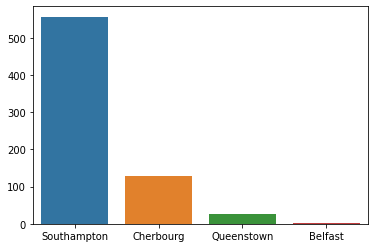

In [174]:
import seaborn as sns

sns.barplot(list(dict_BoardingPlaces.keys()), list(dict_BoardingPlaces.values()))